In [1]:
"""

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
   very good)
   age: woman's age
   yrs_married: number of years married
  children: number of children
  religious: woman's rating of how religious she is (1 = not religious, 4     =strongly religious)
   educ: level of education (9 = grade school, 12 = high school, 14 =
  some college, 16 = college graduate, 17 = some graduate school, 20
  = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =     teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs
"""

'\n\nrate_marriage: woman\'s rating of her marriage (1 = very poor, 5 =\n   very good)\n   age: woman\'s age\n   yrs_married: number of years married\n  children: number of children\n  religious: woman\'s rating of how religious she is (1 = not religious, 4     =strongly religious)\n   educ: level of education (9 = grade school, 12 = high school, 14 =\n  some college, 16 = college graduate, 17 = some graduate school, 20\n  = advanced degree)\n\noccupation: woman\'s occupation (1 = student, 2 = farming/semi-\nskilled/unskilled, 3 = "white collar", 4 =     teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =\nprofessional with advanced degree)\noccupation_husb: husband\'s occupation (same coding as above)\naffairs: time spent in extra-marital affairs\n'

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
 
dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int32
dtype: object

In [6]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


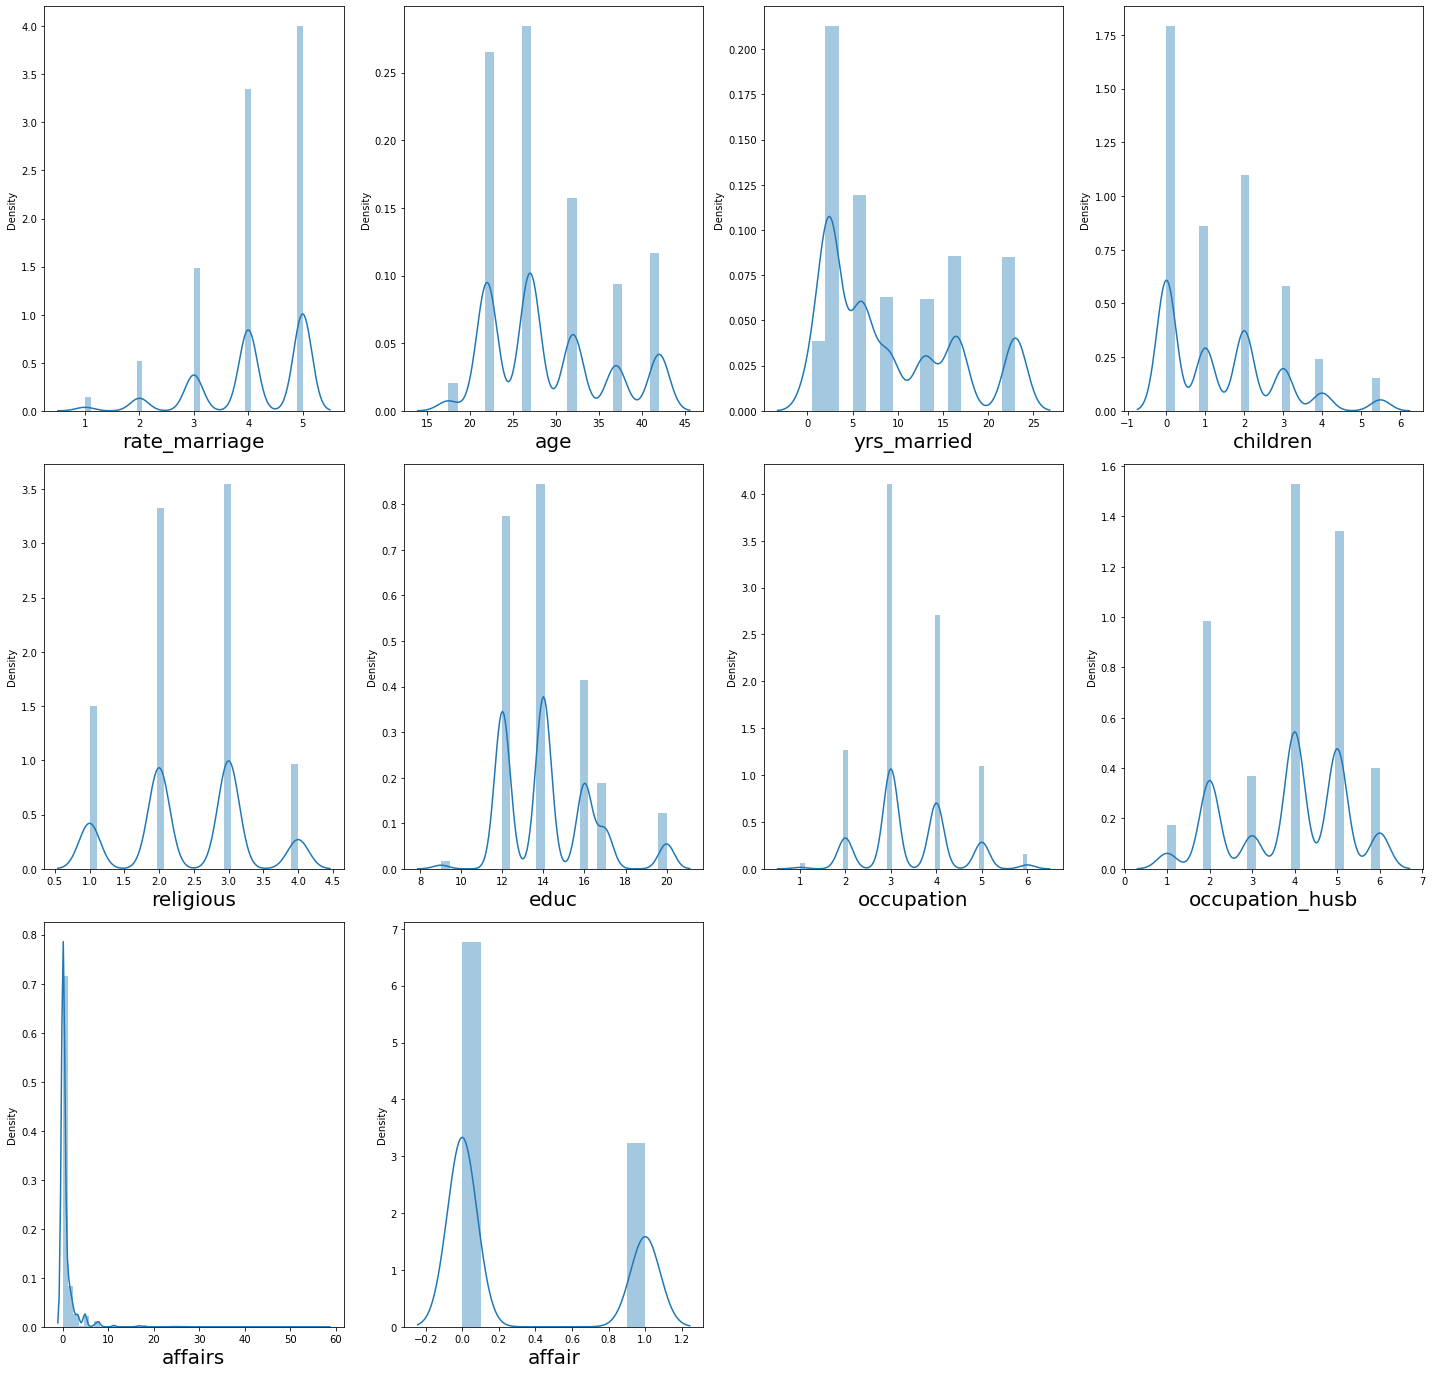

In [8]:
# let's see how data is distributed for every column(univariate analysis)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

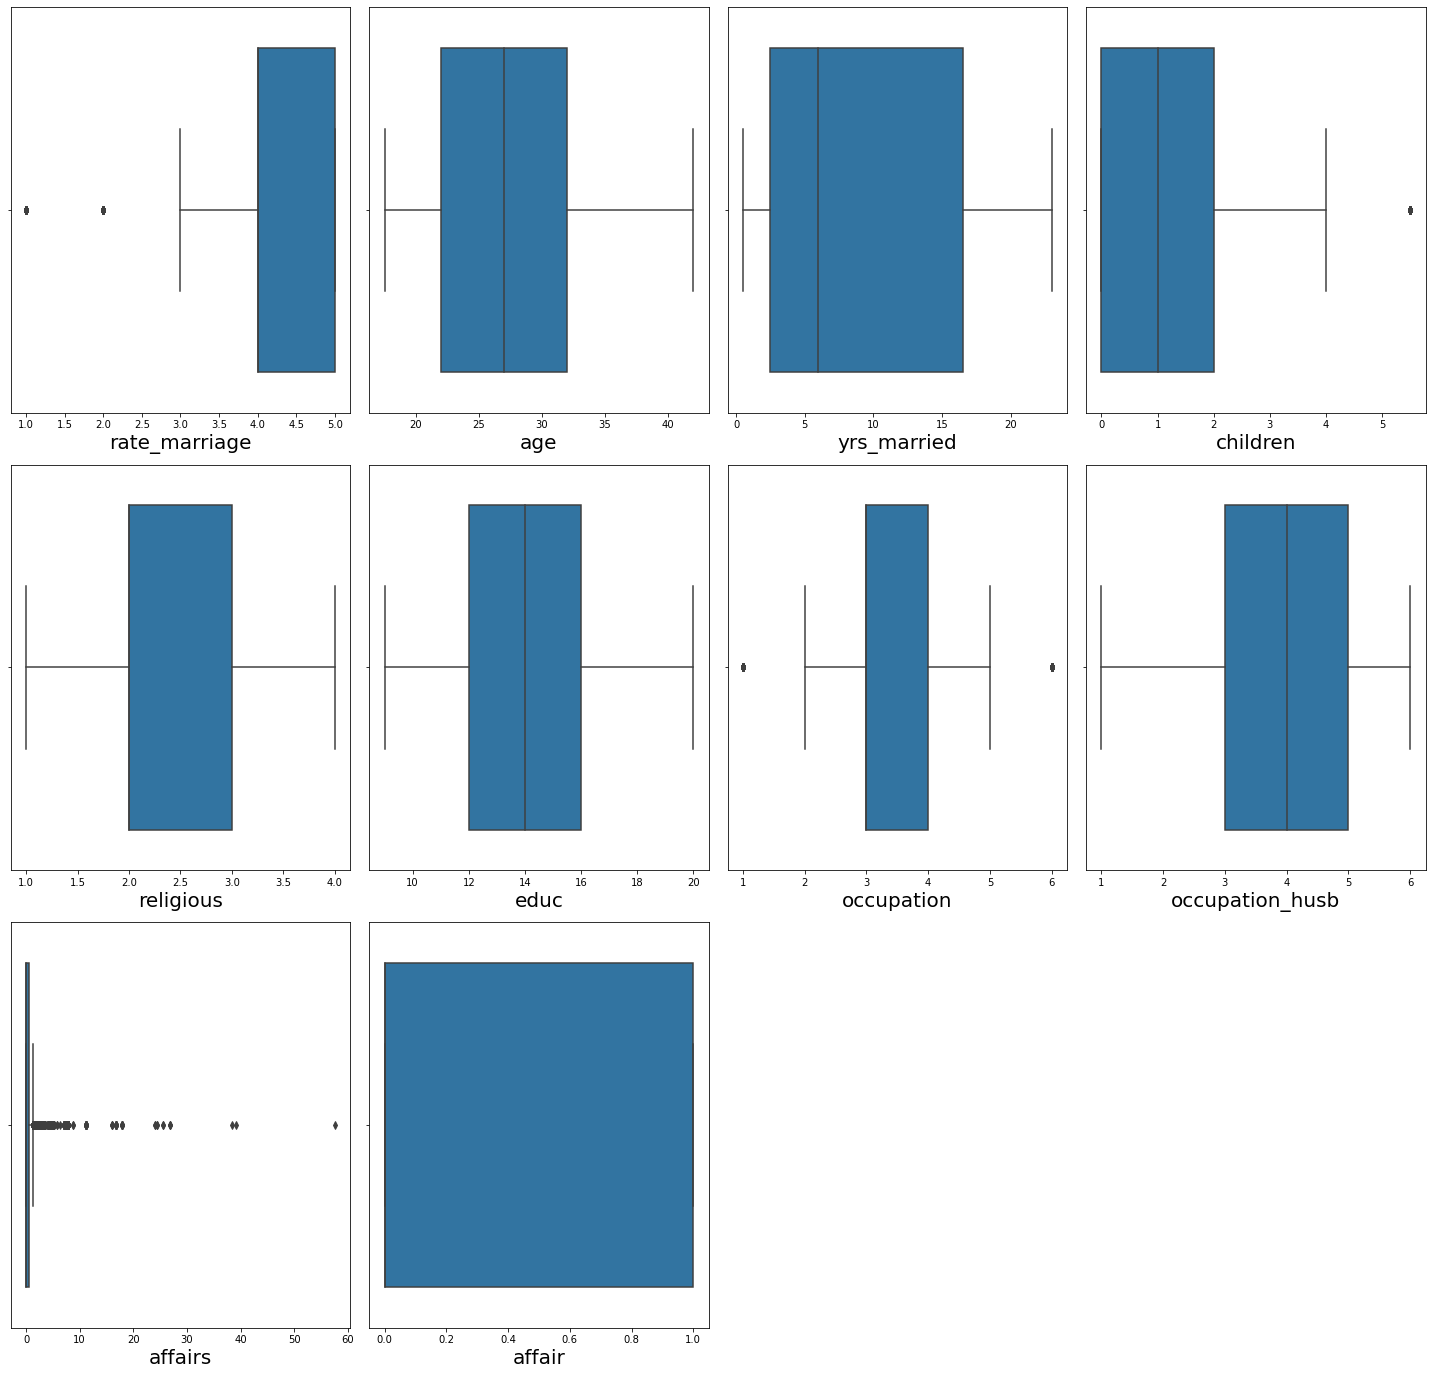

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=column,data=dta)
        plt.xlabel(column,fontsize=20)
#         plt.ylabel('MEDV',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

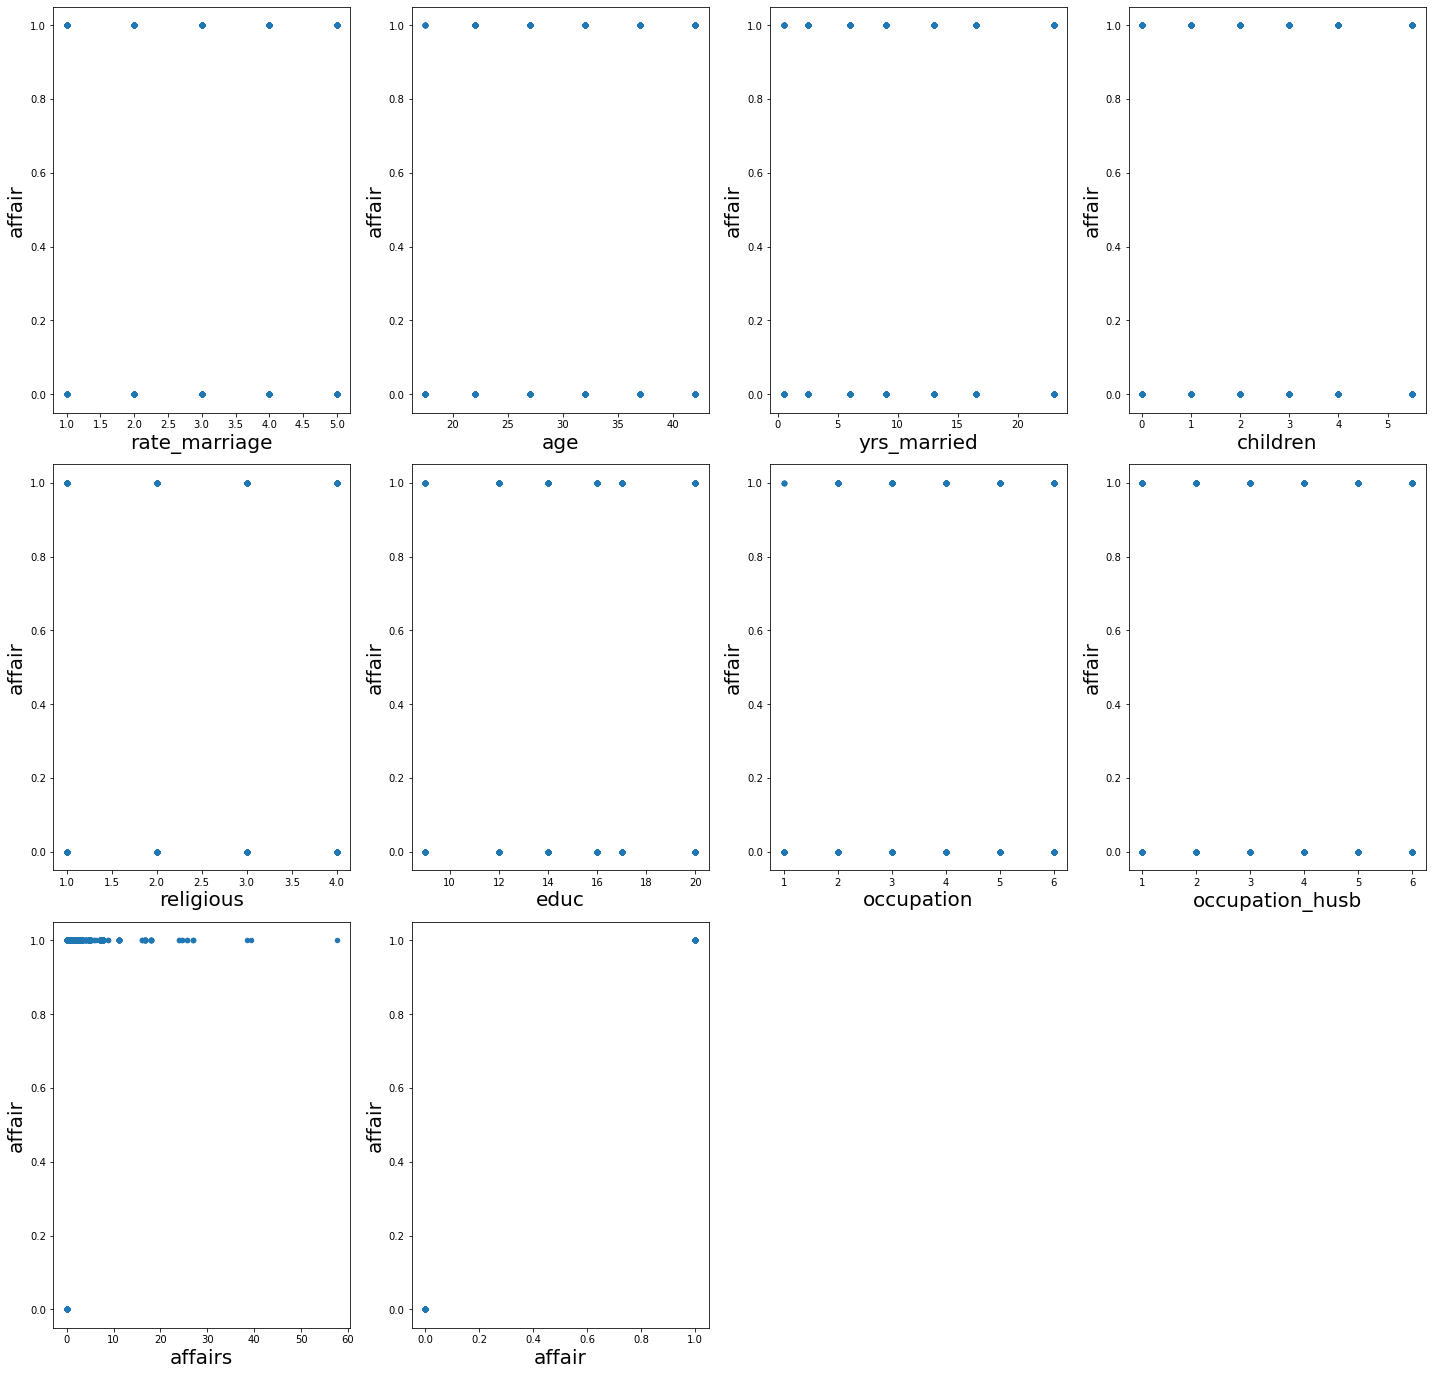

In [10]:
## Bivariate analysis against output variable


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        dta.plot.scatter(x =column, y = 'affair',ax=ax)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('affair',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

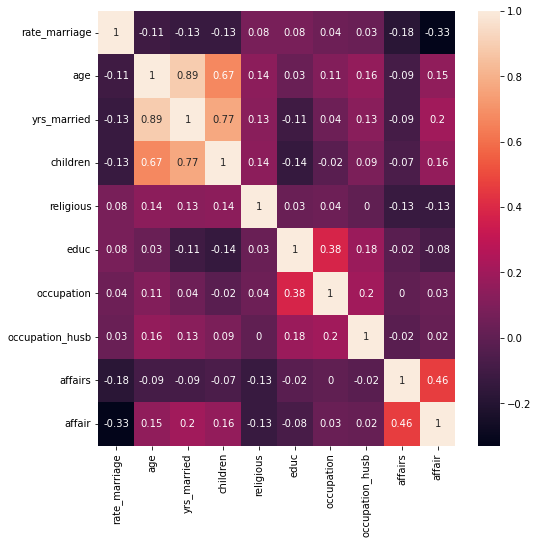

In [11]:
## corelation
plt.figure(figsize=(8,8), facecolor='white')
correlation_matrix =dta.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
dta_X=dta.drop(['affair','affairs'],axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
dta_X_scaled = scalar.fit_transform(dta_X)
dta_X_scaled = pd.DataFrame(dta_X_scaled)

In [14]:
## multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

calc_VIF(dta_X_scaled)

,variables,VIF
0,0,1.034798
1,1,5.454116
2,2,7.142949
3,3,2.528972
4,4,1.036906
5,5,1.296242
6,6,1.206863
7,7,1.082876


Text(0, 0.5, 'affair')

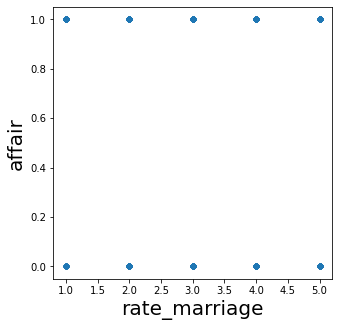

In [15]:
plt.figure(figsize=(5,5), facecolor='white')

ax = plt.subplot()
dta.plot.scatter(x ='rate_marriage', y = 'affair',ax=ax)
plt.xlabel('rate_marriage',fontsize=20)
plt.ylabel('affair',fontsize=20)


In [16]:
((dta[(dta['rate_marriage']==1) & (dta['affair']==0)]).shape[0])/((dta[(dta['rate_marriage']==1)]).shape[0])

0.25252525252525254

In [17]:
for i in range(1,6):
    print(((dta[(dta['rate_marriage']==i) & (dta['affair']==1)]).shape[0])/((dta[(dta['rate_marriage']==i)]).shape[0]))

0.7474747474747475
0.6350574712643678
0.5508559919436052
0.32292595896520965
0.18144560357675113


In [18]:
# dta.groupby('religious')[['affairs','affair']].mean()
dta.groupby('religious') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
religious,,,
1.0,1021,0.399608,1.246989
2.0,2267,0.361270,0.767282
3.0,2422,0.291908,0.545039
4.0,656,0.181402,0.240431


<AxesSubplot:xlabel='religious', ylabel='count'>

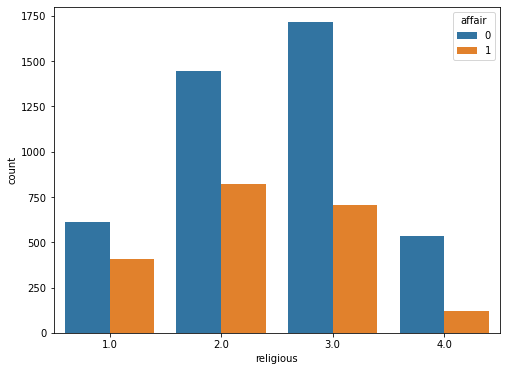

In [19]:
plt.figure(figsize=(8,6))
sns.countplot('religious',data=dta,hue='affair')

In [20]:
# dta.groupby('rate_marriage')[['affairs','affair']].mean()
dta.groupby('rate_marriage') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
rate_marriage,,,
1.0,99,0.747475,1.201671
2.0,348,0.635057,1.615745
3.0,993,0.550856,1.371281
4.0,2242,0.322926,0.674837
5.0,2684,0.181446,0.348174


<AxesSubplot:xlabel='rate_marriage', ylabel='count'>

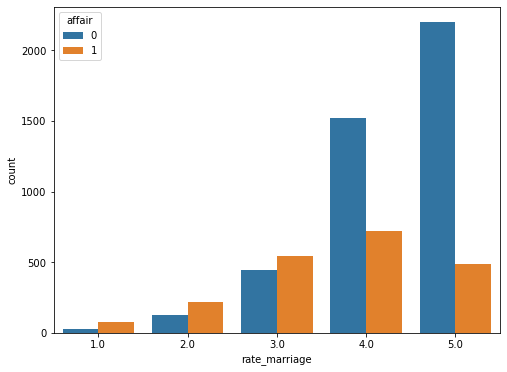

In [21]:
plt.figure(figsize=(8,6))
sns.countplot('rate_marriage',data=dta,hue='affair')

In [22]:
# dta.groupby('children')[['affairs','affair']].mean()
dta.groupby('children') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
children,,,
0.0,2414,0.207954,0.810319
1.0,1159,0.355479,0.942424
2.0,1481,0.410533,0.590307
3.0,781,0.411012,0.461274
4.0,328,0.399390,0.413142
5.5,203,0.389163,0.354787


<AxesSubplot:xlabel='children', ylabel='count'>

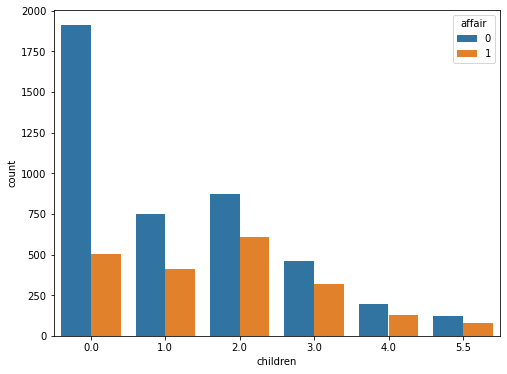

In [23]:
plt.figure(figsize=(8,6))
sns.countplot('children',data=dta,hue='affair')

In [24]:
# dta.groupby('yrs_married')[['affairs','affair']].mean()
dta.groupby('yrs_married') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
yrs_married,,,
0.5,370,0.043243,0.546486
2.5,2034,0.215831,0.984877
6.0,1141,0.339176,0.741184
9.0,602,0.421927,0.737495
13.0,590,0.411864,0.508149
16.5,818,0.451100,0.484304
23.0,811,0.425401,0.369099


<AxesSubplot:xlabel='yrs_married', ylabel='count'>

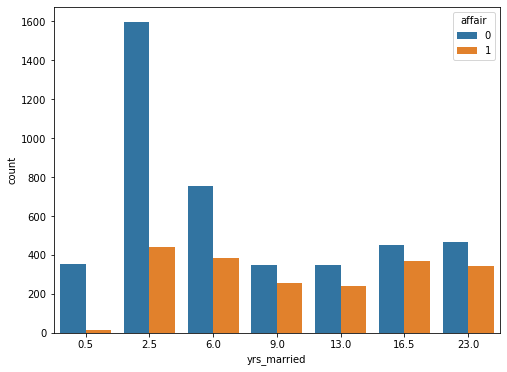

In [25]:
plt.figure(figsize=(8,6))
sns.countplot('yrs_married',data=dta,hue='affair')

In [26]:
# dta.groupby('occupation')[['affairs','affair']].mean()
dta.groupby('occupation') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
occupation,,,
1.0,41,0.170732,0.426014
2.0,859,0.293364,0.719556
3.0,2783,0.346748,0.755248
4.0,1834,0.261723,0.555920
5.0,740,0.417568,0.815209
6.0,109,0.366972,1.194300


<AxesSubplot:xlabel='occupation', ylabel='count'>

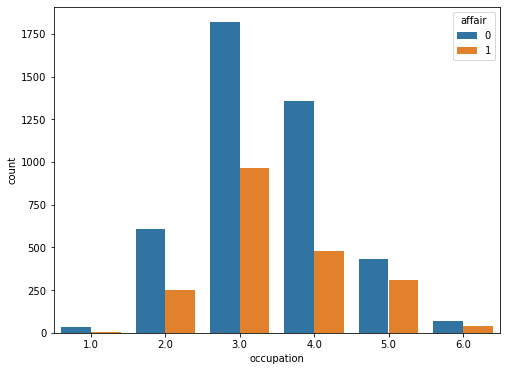

In [27]:
plt.figure(figsize=(8,6))
sns.countplot('occupation',data=dta,hue='affair')

In [28]:
# dta.groupby('occupation_husb')[['affairs','affair']].mean()
dta.groupby('occupation_husb') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
occupation_husb,,,
1.0,229,0.209607,0.657557
2.0,1308,0.325688,0.763874
3.0,490,0.353061,0.809943
4.0,2030,0.314778,0.717594
5.0,1779,0.338392,0.615542
6.0,530,0.311321,0.739709


<AxesSubplot:xlabel='occupation_husb', ylabel='count'>

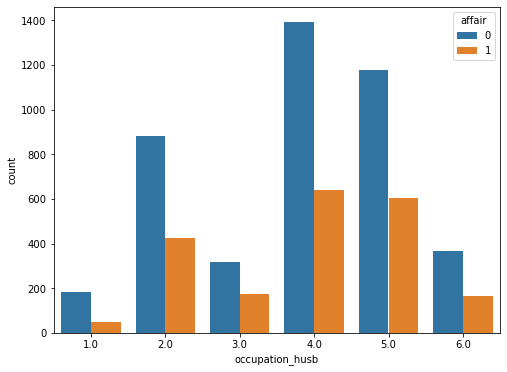

In [29]:
plt.figure(figsize=(8,6))
sns.countplot('occupation_husb',data=dta,hue='affair')

In [30]:
# dta.groupby('educ')[['affairs','affair']].mean()
dta.groupby('educ') \
       .agg(count=('affair', 'size'), affair=('affair', 'mean'),affairs=('affairs', 'mean'))

,count,affair,affairs
educ,,,
9.0,48,0.437500,0.569095
12.0,2084,0.346929,0.683993
14.0,2277,0.354853,0.823679
16.0,1117,0.244405,0.558554
17.0,510,0.274510,0.711906
20.0,330,0.266667,0.530783


<AxesSubplot:xlabel='educ', ylabel='count'>

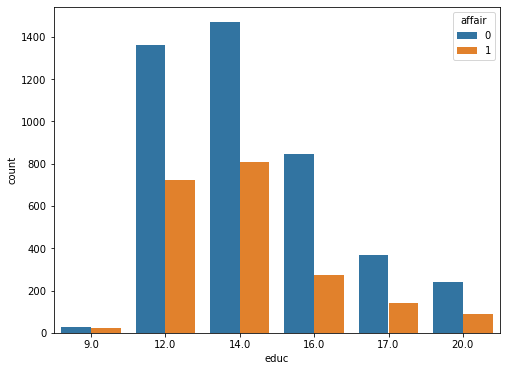

In [31]:
plt.figure(figsize=(8,6))
sns.countplot('educ',data=dta,hue='affair')

In [32]:
lr=LogisticRegression()

In [33]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [102]:
X=dta.drop(['affairs','affair'],axis=1)
y=dta['affair']

In [122]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [104]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int32

In [36]:
y.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [37]:
k=1
seed =100
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

In [38]:
X_res.shape

(8626, 8)

In [39]:
y_res.value_counts()

1    4313
0    4313
Name: affair, dtype: int64

In [66]:
X_scaled = scalar.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

In [68]:
lr.fit(X_train, y_train)

LogisticRegression()

In [69]:
 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [70]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy
## accuracy before upsampling -- 0.7197802197802198

0.7197802197802198

In [71]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[753,  96],
       [261, 164]], dtype=int64)

In [72]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [73]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy
## accuracy before upsampling -- 0.7197802197802198

0.7197802197802198

In [74]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision
## precision before scaling and upsampling -- 0.8869257950530035

0.8869257950530035

In [75]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall
## Recall before scaling and upsampling -- 0.742603550295858

0.742603550295858

In [76]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score
## F1_Score before scaling and upsampling -- 0.8083735909822866

0.8083735909822866

In [77]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc
## auc before scaling and upsampling -- 0.6364040739970899

0.6364040739970899

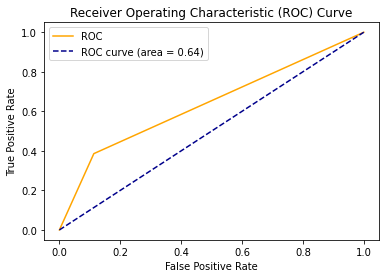

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [79]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [80]:
Find_Optimal_Cutoff(y_test, y_pred)

[1]

In [81]:
thresholds

array([2, 1, 0])

In [82]:

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score


# clf = LogisticRegression(class_weight="balanced")
# clf.fit(X_train, y_train)
THRESHOLD = 0.4
preds = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.711931
recall,0.548235
precision,0.571078
roc_auc_score,0.671055


In [83]:
lr.predict_proba(X_test)

array([[0.64065351, 0.35934649],
       [0.41245483, 0.58754517],
       [0.72845116, 0.27154884],
       ...,
       [0.7402674 , 0.2597326 ],
       [0.55828057, 0.44171943],
       [0.53198869, 0.46801131]])

In [84]:
fpr, tpr, thresholds

(array([0.       , 0.1130742, 1.       ]),
 array([0.        , 0.38588235, 1.        ]),
 array([2, 1, 0]))

In [85]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 1 with G-Mean: 0.585
FPR: 0.1131, TPR: 0.3859


In [86]:
thresholds

array([2, 1, 0])

In [87]:
index

1

In [88]:
th_optimal = thresholds[np.argmax(tpr+1- fpr)]

In [89]:
th_optimal

1

In [90]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(lr,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       849
           1       0.57      0.55      0.56       425

    accuracy                           0.71      1274
   macro avg       0.67      0.67      0.67      1274
weighted avg       0.71      0.71      0.71      1274



In [92]:
preds

array([0, 1, 0, ..., 0, 1, 1])

In [96]:
X_test.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
5988,-0.114053,1.886445,1.921902,1.816103,1.791905,0.821981,0.611118,0.111309
217,-1.154252,-0.304185,-0.001295,1.118441,-0.485222,-1.014709,0.611118,0.854069
5339,-0.114053,-1.034396,-0.894207,-0.974546,-0.485222,-0.096364,-0.450087,-1.374211
491,0.926147,0.426025,1.028989,0.420778,-0.485222,2.658670,0.611118,0.111309
3765,-0.114053,1.886445,1.921902,1.118441,-0.485222,-1.014709,-0.450087,-0.631451


In [97]:
y_test.head()

5988    0
217     1
5339    0
491     1
3765    0
Name: affair, dtype: int32

In [99]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [101]:
dta.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [116]:
lr.predict(np.asarray(X.iloc[0]).reshape(-1, 1))

ValueError: X has 1 features, but LogisticRegression is expecting 8 features as input.

In [121]:
lr.predict(scalar.transform(X.iloc[[1]]))

array([1])